<a href="https://colab.research.google.com/github/Mmarlo5/psychic-doodle/blob/main/Problem_Set_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I decided to change my research focus a little bit. I have decided that I will be looking to see if public opinion on abortion matches abortion restrictions across the United States. 
The first dataset comes from Pew Research Center and contains data on the views about Abortion by State (https://www.pewresearch.org/religion/religious-landscape-study/compare/views-about-abortion/by/state/) 

The second dataset comes from the State Policy Database and also contains data on the type of restrictions that each state has, so the common variable for all the datasets is "states." https://www.statepolicyindex.com/data/" *the data I used is contained in the CSV file titled "abortion."

The third dataset comes from (https://www.guttmacher.org/article/2022/03/2022-state-legislative-sessions-abortion-bans-and-restrictions-medication-abortion) which also contains more abservations on support of abortion by state which adds more observations to the first dataset. 

I also added a fourth dataset which came from (https://data.guttmacher.org/states/table?topics=65&dataset=data&state=AL+AK+AZ+AR+CA+CO+CT+DE+DC+FL+GA+HI+ID+IL+IN+IA+KS+KY+LA+ME+MD+MA+MI+MN+MS+MO+MT+NE+NV+NH+NJ+NM+NY+NC+ND+OH+OK+OR+PA+RI+SC+SD+TN+TX+UT+VT+VA+WA+WV+WI+WY). This dataset contains information on the number of abortions conducted in each U.S State per 1,000 women in 2020. 

I chose those datasets because one provided the information I needed to determine public support of abortion, and the other dataset provided very detailed information on the type of restrictions in each state. The thid provided me with more observations for public opinion on abortion. 

My research question is: Do abortion restrictions in states, match public opinion on abortion in that state? 

Hypothesis: I hypothesis that public opinion and abortion restrictions are similar. 

 


In [31]:

import time, os, sys, re 
import zipfile, json, datetime, string    
import numpy as np
from statistics import *

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import urllib

from google.colab import files

import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      


! pip install geopandas 
import geopandas as gpd  

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"






Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
abortion1 = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Abortion%20support%20by%20state.csv")
abortion1.head()

,State,Legal in all/most cases,Illegal in all/most cases,Don't know,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Alabama,37%,58%,4%,NaN,NaN,NaN
1,Alaska,63%,34%,3%,NaN,NaN,NaN
2,Arizona,49%,46%,4%,NaN,NaN,NaN
3,Arkansas,38%,60%,2%,NaN,NaN,NaN
4,California,57%,38%,5%,NaN,NaN,NaN


In [33]:
abortion1.rename(columns={'Don\'t know': 'Do_not_know'}, inplace=True)
abortion1.head()

,State,Legal in all/most cases,Illegal in all/most cases,Do_not_know,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Alabama,37%,58%,4%,NaN,NaN,NaN
1,Alaska,63%,34%,3%,NaN,NaN,NaN
2,Arizona,49%,46%,4%,NaN,NaN,NaN
3,Arkansas,38%,60%,2%,NaN,NaN,NaN
4,California,57%,38%,5%,NaN,NaN,NaN


In [34]:
abortion1.drop(columns= {'Unnamed: 4','Unnamed: 5','Unnamed: 6'},inplace=True)
               
abortion1.head()

,State,Legal in all/most cases,Illegal in all/most cases,Do_not_know
0,Alabama,37%,58%,4%
1,Alaska,63%,34%,3%
2,Arizona,49%,46%,4%
3,Arkansas,38%,60%,2%
4,California,57%,38%,5%


In [35]:
abortion2 = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Abortion%20Data2.csv")
abortion2.head()

,State,Pgestlim,Pparbth,Pwait,Unnamed: 4
0,Alabama,1,1,0,NaN
1,Alaska,0,0,0,NaN
2,Arizona,1,0,0,NaN
3,Arkansas,1,0,0,NaN
4,California,1,0,0,NaN


In [36]:
abortion2.drop(columns={'Unnamed: 4'}, inplace=True)
               
abortion2.head()

,State,Pgestlim,Pparbth,Pwait
0,Alabama,1,1,0
1,Alaska,0,0,0
2,Arizona,1,0,0
3,Arkansas,1,0,0
4,California,1,0,0


In [37]:
abortion2.replace(np.nan,"None", inplace=True)
abortion2.head()

,State,Pgestlim,Pparbth,Pwait
0,Alabama,1,1,0
1,Alaska,0,0,0
2,Arizona,1,0,0
3,Arkansas,1,0,0
4,California,1,0,0


In [38]:
abortion2.replace('Pgestlim', np.nan,inplace=True)
abortion2.head()

,State,Pgestlim,Pparbth,Pwait
0,Alabama,1,1,0
1,Alaska,0,0,0
2,Arizona,1,0,0
3,Arkansas,1,0,0
4,California,1,0,0


In [39]:
mergedOuter = pd.merge(abortion1, abortion2, how='outer', on=['State'],indicator=True) #outer=keep all
mergedOuter

,State,Legal in all/most cases,Illegal in all/most cases,Do_not_know,Pgestlim,Pparbth,Pwait,_merge
0,Alabama,37%,58%,4%,1.0,1.0,0.0,both
1,Alaska,63%,34%,3%,0.0,0.0,0.0,both
2,Arizona,49%,46%,4%,1.0,0.0,0.0,both
3,Arkansas,38%,60%,2%,1.0,0.0,0.0,both
4,California,57%,38%,5%,1.0,0.0,0.0,both
5,Colorado,59%,36%,5%,0.0,0.0,0.0,both
6,Connecticut,67%,28%,5%,1.0,0.0,0.0,both
7,Delaware,55%,38%,6%,1.0,0.0,0.0,both
8,District of Columbia,70%,26%,4%,NaN,NaN,NaN,left_only
9,Florida,56%,39%,5%,1.0,0.0,0.0,both


In [40]:
abortion3=pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Abortion%20data_3.csv")
abortion3.head()

,STATE,MOSTLY LEGAL,MOSTLY ILLEGAL
0,Louisiana,36%,59%
1,Arkansas,38%,57%
2,Mississippi,39%,55%
3,West Virginia,40%,55%
4,Alabama,40%,55%


In [41]:
abortion3.rename(columns={'MOSTLY LEGAL': 'Legal in all/most cases'}, inplace=True)
abortion3.head()

,STATE,Legal in all/most cases,MOSTLY ILLEGAL
0,Louisiana,36%,59%
1,Arkansas,38%,57%
2,Mississippi,39%,55%
3,West Virginia,40%,55%
4,Alabama,40%,55%


In [42]:
abortion3.rename(columns={'MOSTLY ILLEGAL': 'Illegal in all/most cases'}, inplace=True)
abortion3.head()

,STATE,Legal in all/most cases,Illegal in all/most cases
0,Louisiana,36%,59%
1,Arkansas,38%,57%
2,Mississippi,39%,55%
3,West Virginia,40%,55%
4,Alabama,40%,55%


In [43]:
abortion3.rename(columns={'STATE': 'State'}, inplace=True)
abortion3.head()

,State,Legal in all/most cases,Illegal in all/most cases
0,Louisiana,36%,59%
1,Arkansas,38%,57%
2,Mississippi,39%,55%
3,West Virginia,40%,55%
4,Alabama,40%,55%


In [44]:
mergedOuter = pd.merge(abortion1, abortion3, how='outer', on=['State'],indicator=True) #outer=keep all
mergedOuter

,State,Legal in all/most cases_x,Illegal in all/most cases_x,Do_not_know,Legal in all/most cases_y,Illegal in all/most cases_y,_merge
0,Alabama,37%,58%,4%,40%,55%,both
1,Alaska,63%,34%,3%,60%,35%,both
2,Arizona,49%,46%,4%,54%,41%,both
3,Arkansas,38%,60%,2%,38%,57%,both
4,California,57%,38%,5%,57%,38%,both
5,Colorado,59%,36%,5%,57%,37%,both
6,Connecticut,67%,28%,5%,65%,29%,both
7,Delaware,55%,38%,6%,58%,37%,both
8,District of Columbia,70%,26%,4%,NaN,NaN,left_only
9,Florida,56%,39%,5%,56%,38%,both


In [45]:

grouped = abortion3.groupby(['State'])
result = grouped['Legal in all/most cases'].sum()
result

State
Alabama           40%
Alaska            60%
Arizona           54%
Arkansas          38%
California        57%
Colorado          57%
Connecticut       65%
D.C.              70%
Delaware          58%
Florida           56%
Georgia           49%
Hawaii            66%
Idaho             43%
Illinois          56%
Indiana           46%
Iowa              52%
Kansas            48%
Kentucky          41%
Louisiana         36%
Maine             62%
Maryland          63%
Massachusetts     70%
Michigan          55%
Minnesota         54%
Mississippi       39%
Missouri          47%
Montana           52%
Nebraska          46%
Nevada            63%
New Hampshire     65%
New Jersey        62%
New Mexico        52%
New York          63%
North Carolina    49%
North Dakota      47%
Ohio              52%
Oklahoma          49%
Oregon            62%
Pennsylvania      53%
Rhode Island      64%
South Carolina    45%
South Dakota      47%
Tennessee         40%
Texas             46%
Utah              43%
Virg

In [46]:
grouped = abortion3.groupby(['State'])
result = grouped['Illegal in all/most cases'].sum()
result

State
Alabama           55%
Alaska            35%
Arizona           41%
Arkansas          57%
California        38%
Colorado          37%
Connecticut       29%
D.C.              26%
Delaware          37%
Florida           38%
Georgia           46%
Hawaii            29%
Idaho             50%
Illinois          40%
Indiana           48%
Iowa              45%
Kansas            47%
Kentucky          53%
Louisiana         59%
Maine             34%
Maryland          32%
Massachusetts     25%
Michigan          39%
Minnesota         40%
Mississippi       55%
Missouri          47%
Montana           42%
Nebraska          47%
Nevada            32%
New Hampshire     30%
New Jersey        33%
New Mexico        42%
New York          32%
North Carolina    44%
North Dakota      50%
Ohio              43%
Oklahoma          45%
Oregon            35%
Pennsylvania      41%
Rhode Island      30%
South Carolina    47%
South Dakota      50%
Tennessee         53%
Texas             48%
Utah              53%
Virg

In [47]:
abortion4 = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Abortion4.csv")
abortion4.head()

,U.S. State,"% change in abortion rate, 2017-2020","No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020",Unnamed: 3,Unnamed: 4
0,Alabama,-6,6.0,NaN,NaN
1,Alaska,0,8.6,NaN,NaN
2,Arizona,1,9.3,NaN,NaN
3,Arkansas,2,5.6,NaN,NaN
4,California,17,19.2,NaN,NaN


In [48]:
abortion4.replace(np.nan,"None", inplace=True)
abortion4.head()

,U.S. State,"% change in abortion rate, 2017-2020","No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020",Unnamed: 3,Unnamed: 4
0,Alabama,-6,6.0,None,None
1,Alaska,0,8.6,None,None
2,Arizona,1,9.3,None,None
3,Arkansas,2,5.6,None,None
4,California,17,19.2,None,None


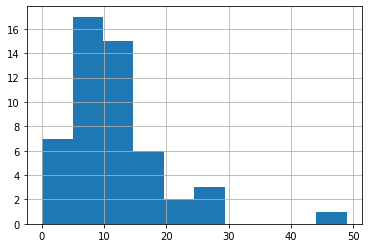

In [49]:
abortion4["No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020"].hist()